In [240]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os

In [267]:
sns.set_theme(style="ticks")
sns.set_style("whitegrid", {'axes.grid' : True})

In [334]:
def detect_invalid_file(data, file_name):
    custom = []
    adobe = []
    for test in data:
        if test['display mode'] == 'custom':
            custom += [test["test"]]
        elif test['display mode'] == 'adobe':
            adobe += [test["test"]]
    if sorted(custom) != sorted(adobe):
        print(f"{len(data)} - {file_name}: custom-{sorted(custom)} vs adobe-{sorted(adobe)}")

def load_files_as_big_list(get="all"):
    output = []
    path_to_json = './Results/'
    json_files = [file for file in os.listdir(path_to_json) if file.endswith('.json')]
    c = 0
    for file_name in json_files:
        if get=="ca" and (f"-{get}-") not in file_name:
            continue
        elif get=="ac" and (f"-{get}-") not in file_name:
            continue
        elif get=="all":
            pass
        c += 1
        with open(path_to_json + file_name) as f:
            data = json.load(f)
            detect_invalid_file(data, file_name)
            # note: I'm including an extra entry for name
            data += [{"file name":file_name.replace(".json", "")}]
            output += data
    print (f"Number of files: {c}\n")
    return output

all_files = load_files_as_big_list()

19 - s-ca-eleanor.json: custom-[0, 1, 2, 3, 4, 5, 6, 7, 8, 9] vs adobe-[1, 2, 3, 4, 5, 6, 7, 8, 9]
21 - s-ac-kevin.json: custom-[0, 1, 2, 3, 4, 5, 6, 7, 8, 9] vs adobe-[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 9]
20 - j-ca-lauren-p1.json: custom-[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 9] vs adobe-[1, 2, 3, 4, 5, 6, 7, 8, 9]
20 - j-ac-virginia-pt1.json: custom-[1, 2, 3, 4, 5, 6, 7, 8, 9] vs adobe-[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 9]
20 - j-ac-virginia-pt2.json: custom-[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 9] vs adobe-[1, 2, 3, 4, 5, 6, 7, 8, 9]
20 - c-ca-nicole.json: custom-[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 9] vs adobe-[1, 2, 3, 4, 5, 6, 7, 8, 9]
20 - c-ca-saphi.json: custom-[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 9] vs adobe-[1, 2, 3, 4, 5, 6, 7, 8, 9]
21 - s-ca-erin.json: custom-[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 9] vs adobe-[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
20 - j-ca-lauren-p2.json: custom-[1, 2, 3, 4, 5, 6, 7, 8, 9] vs adobe-[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 9]
20 - j-ac-sean-pt1.json: custom-[1, 2, 3, 4, 5, 6, 7, 8, 9] vs adobe-[0, 

In [306]:
columns=[header for header in all_files[0]]
print (columns)
myColumns = [
    'display mode', 'stage', 'test', 'target color', 
    'submitted color', 'selected colors', 'grid clicks', 'block clicks', 
    'strip clicks', 'compare clicks', 'time', 'file name',
] # not doing selected_colors just yet

['display mode', 'stage', 'test', 'target color', 'submitted color', 'selected colors', 'grid clicks', 'block clicks', 'strip clicks', 'compare clicks', 'time']


In [307]:
# data = {col:[] for col in myColumns}

def split_rgb_string(rgb):
    s = rgb.replace("(","").replace(")","")
    ls = s.split(",")
    return int(ls[0]), int(ls[1]), int(ls[2])

def parse_colors(myData):
    d = myData.copy()
    target_r = []
    target_g = []
    target_b = []
    submit_r = []
    submit_g = []
    submit_b = []
    for ele in myData['target color']:
        r,g,b = split_rgb_string(ele)
        target_r += [r]
        target_g += [g]
        target_b += [b]
    for ele in myData['submitted color']:
        r,g,b = split_rgb_string(ele)
        submit_r += [r]
        submit_g += [g]
        submit_b += [b] 
    
    del d['target color']
    del d['submitted color']
    d["target_r"] = target_r
    d["target_g"] = target_g
    d["target_b"] = target_b
    d["submit_r"] = submit_r
    d["submit_g"] = submit_g
    d["submit_b"] = submit_b
    
    d["r_diff"] = [abs(target_r[i] - submit_r[i]) for i in range(len(target_r))]
    d["g_diff"] = [abs(target_g[i] - submit_g[i]) for i in range(len(target_g))]
    d["b_diff"] = [abs(target_b[i] - submit_b[i]) for i in range(len(target_b))]
    d['total_diff'] = [(d["r_diff"][i] + d["g_diff"][i] + d["b_diff"][i]) for i in range(len(target_r))]
    return d  

def get_tabular_data(files):
    data = {col:[] for col in myColumns}
    count = 0
    for file in files:
        if "file name" in file:
            data['file name'] += [file['file name'] for i in range(count)]
            count = 0
        else:
            count += 1
            for ele in file:
                data[ele] += [file[ele]]
    return parse_colors(data)

all_data = get_tabular_data(all_files)
all_df = pd.DataFrame(all_data)
print (f"{len(all_files)} vs {len(all_df)}\n")
# NOTE: The difference is values is related to the filename

675 vs 643

294 vs 280

381 vs 363



In [308]:
all_df.head()

,display mode,stage,test,selected colors,grid clicks,block clicks,strip clicks,compare clicks,time,file name,target_r,target_g,target_b,submit_r,submit_g,submit_b,r_diff,g_diff,b_diff,total_diff
0,custom,0,0,"[(125,127,63), (116,127,63), (174,196,67), (17...",27,4,5,19,76.433,j-ca-claire,200,215,50,195,217,42,5,2,8,15
1,custom,0,1,"[(127,102,63), (152,109,42), (152,109,42), (17...",69,2,4,32,119.619,j-ca-claire,167,129,49,169,125,57,2,4,8,14
2,custom,0,2,"[(127,63,90), (190,67,119), (156,34,85), (181,...",32,5,4,29,103.108,j-ca-claire,174,3,97,174,9,92,0,6,5,11
3,custom,0,3,"[(76,63,127), (108,63,127), (60,13,81), (60,13...",10,11,2,9,47.421,j-ca-claire,71,39,78,67,39,77,4,0,1,5
4,custom,0,4,"[(127,63,115), (127,63,73), (127,63,89), (209,...",11,13,7,16,92.856,j-ca-claire,196,73,131,194,73,124,2,0,7,9


In [309]:
subset_cols = [
    "grid clicks", "block clicks", "strip clicks", "compare clicks", 
    "time", "r_diff", "g_diff", "b_diff"
]
# all_df.groupby(["display mode"]).mean()
all_df.groupby(["display mode"]).mean()[subset_cols]

,grid clicks,block clicks,strip clicks,compare clicks,time,r_diff,g_diff,b_diff
display mode,,,,,,,,
adobe,1.059375,17.400000,4.475000,13.693750,65.673709,14.465625,11.375000,13.628125
custom,14.628483,9.071207,4.244582,17.795666,82.232567,13.213622,10.356037,13.266254


Comments
- Users spent `more time with custom` but where `more accurate on average` across all 3 values of rgb
- Users spent `about the same time clicking the rainbow slider`, but had `disproportionate number of block clicks`. With the custom picker, there was a significant lesser amount of block-clicks. The differences in grid-clicks is related to the nature of the tests.

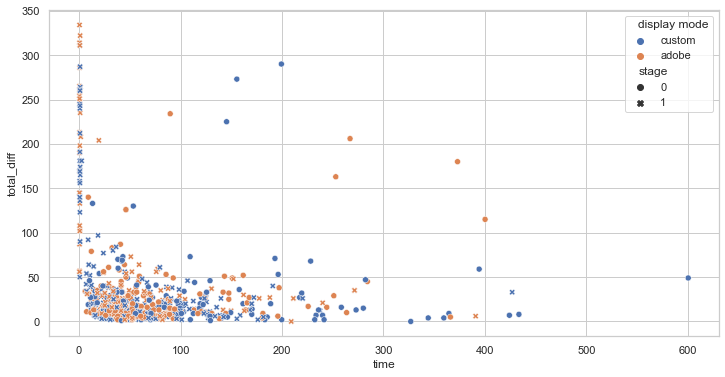

In [312]:
fig, ax = plt.subplots(1,1, figsize=(12,6))
sns.scatterplot(data=all_df, x='time', y='total_diff', hue='display mode', style="stage",ax=ax)
plt.show()

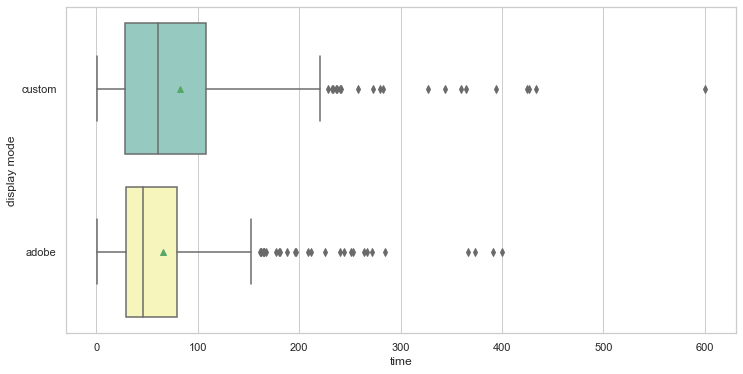

In [313]:
fig, ax = plt.subplots(1,1, figsize=(12,6))
sns.boxplot(y="display mode", x="time", data=all_df, palette="Set3", orient="h", showmeans=True, ax=ax)
plt.show();

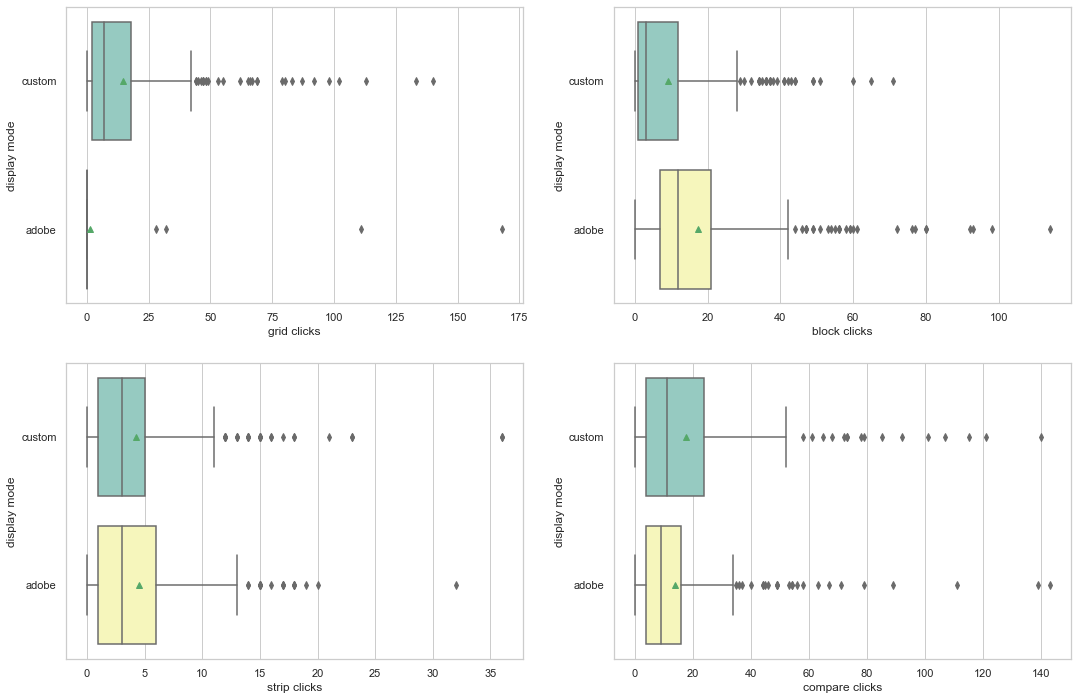

In [314]:
fig, axs = plt.subplots(2,2, figsize=(18,12))
sns.boxplot(y="display mode", x="grid clicks", data=all_df, palette="Set3", orient="h", ax=axs[0][0], showmeans=True)
sns.boxplot(y="display mode", x="block clicks", data=all_df, palette="Set3", orient="h", ax=axs[0][1], showmeans=True)
sns.boxplot(y="display mode", x="strip clicks", data=all_df, palette="Set3", orient="h", ax=axs[1][0], showmeans=True)
sns.boxplot(y="display mode", x="compare clicks", data=all_df, palette="Set3", orient="h", ax=axs[1][1], showmeans=True)
plt.show()

In [315]:
describe_columns = [
    "grid clicks","block clicks","strip clicks",
    "compare clicks","time","total_diff",
]

In [316]:
all_df[all_df['display mode'] == "custom"].describe()[describe_columns]

,grid clicks,block clicks,strip clicks,compare clicks,time,total_diff
count,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000
mean,14.628483,9.071207,4.244582,17.795666,82.232567,36.835913
std,21.243444,12.612151,4.863247,20.873809,82.473812,56.079422
min,0.000000,0.000000,0.000000,0.000000,0.606000,0.000000
25%,2.000000,1.000000,1.000000,4.000000,28.037500,8.000000
50%,7.000000,3.000000,3.000000,11.000000,60.708000,18.000000
75%,18.000000,12.000000,5.000000,24.000000,107.792000,35.000000
max,140.000000,71.000000,36.000000,140.000000,600.417000,311.000000


In [317]:
all_df[all_df['display mode'] == "adobe"].describe()[describe_columns]

,grid clicks,block clicks,strip clicks,compare clicks,time,total_diff
count,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000
mean,1.059375,17.400000,4.475000,13.693750,65.673709,39.468750
std,11.473545,17.924152,4.474869,17.835717,64.808895,62.345676
min,0.000000,0.000000,0.000000,0.000000,0.448000,0.000000
25%,0.000000,7.000000,1.000000,4.000000,29.438500,9.000000
50%,0.000000,12.000000,3.000000,9.000000,46.480500,18.000000
75%,0.000000,21.000000,6.000000,16.000000,79.675750,34.000000
max,168.000000,114.000000,32.000000,143.000000,400.191000,334.000000


Explore the following visualizations
- https://seaborn.pydata.org/examples/grouped_boxplot.html
- https://seaborn.pydata.org/examples/horizontal_boxplot.html
- https://seaborn.pydata.org/examples/faceted_histogram.html
- https://seaborn.pydata.org/examples/anscombes_quartet.html
- https://seaborn.pydata.org/examples/scatterplot_matrix.html
- https://seaborn.pydata.org/examples/wide_form_violinplot.html

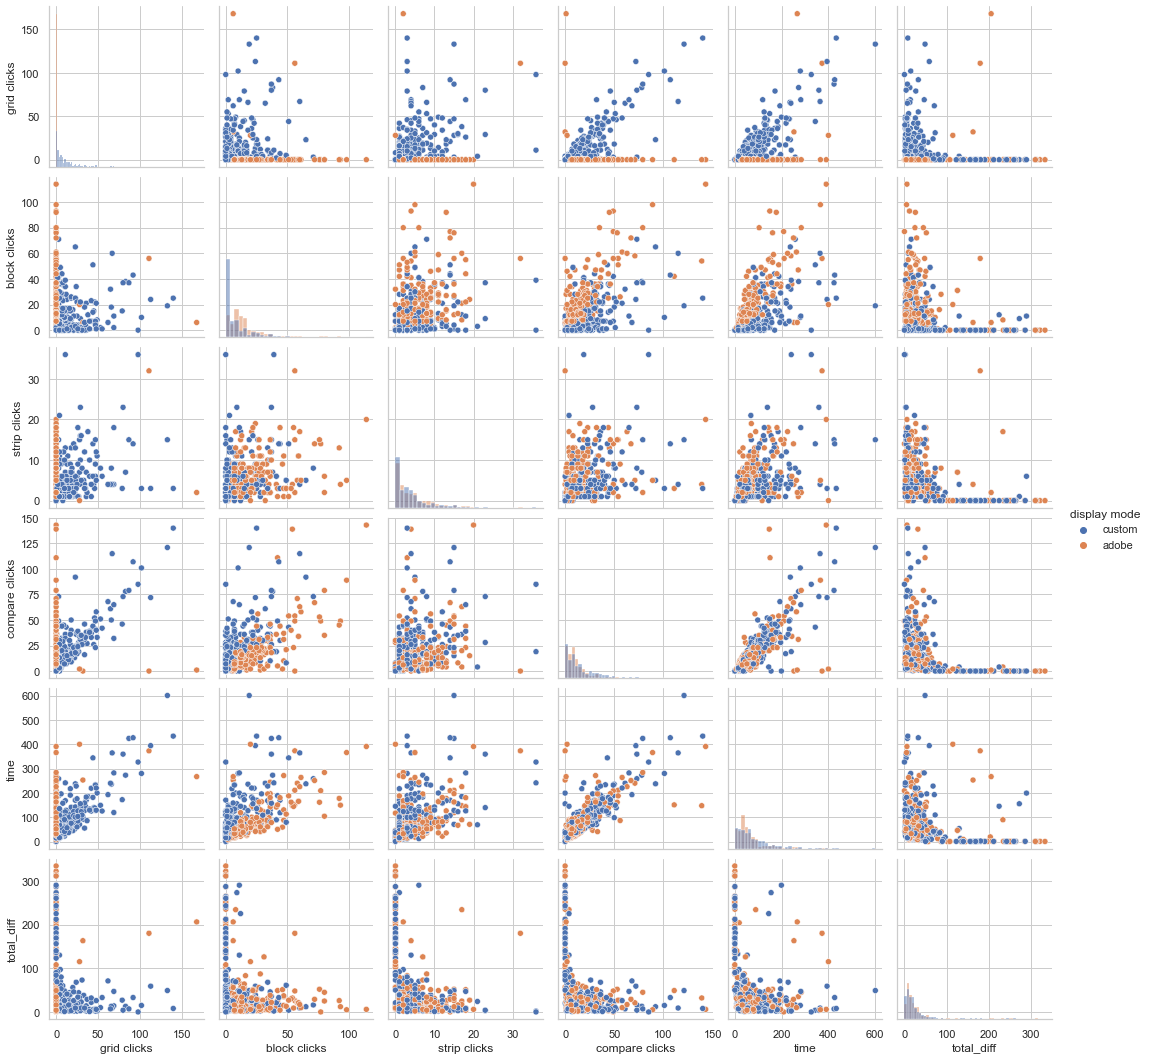

In [318]:
sns.pairplot(
    all_df[describe_columns + ["display mode"]], 
    hue='display mode',
    diag_kind="hist", # feel free to remove this parameter for more visually appealing distributions
)
plt.show()

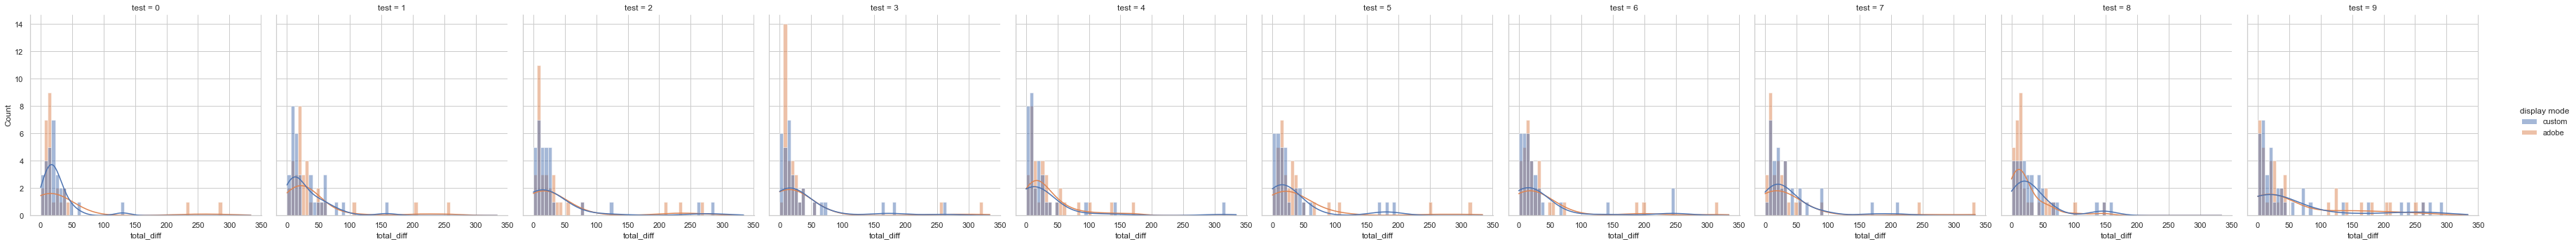

In [319]:
sns.displot(data=all_df, x="total_diff", hue="display mode", col="test",kde=True)
plt.show()

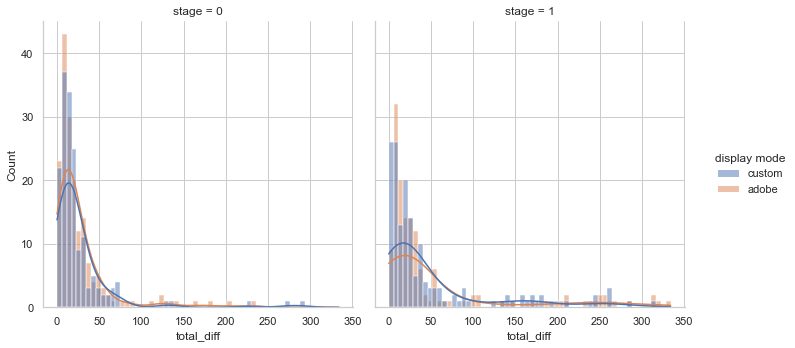

In [320]:
sns.displot(data=all_df, x="total_diff", hue="display mode", col="stage",kde=True)
plt.show()